In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

 
# Load red wine data.
data = pd.read_csv('winequality-red.csv', sep=';')

data.shape


(1599, 12)

In [3]:
data.describe()  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


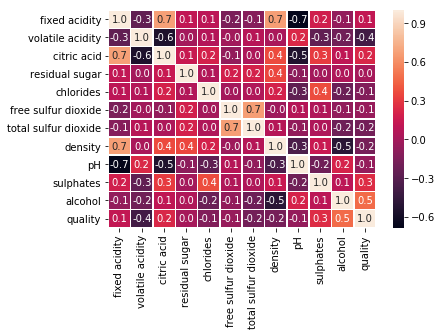

In [4]:
y = data.quality
X = data.drop('quality', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46, stratify=y)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

import seaborn as sns
corr_matrx = data.corr()
sns.heatmap(corr_matrx, annot=True, linewidths=.5, fmt= '.1f')


In [5]:
X_train_scaled.mean(axis=0)

array([ -9.08316945e-16,   1.58330477e-16,   2.70828447e-17,
         7.63875107e-18,  -1.86802185e-16,   9.72204681e-18,
        -2.77772766e-17,  -5.50962282e-14,   2.45551125e-15,
        -4.23603468e-16,  -3.76382098e-16])

In [6]:
X_train_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [7]:
X_test_scaled = scaler.transform(X_test)

In [8]:
X_test_scaled.mean(axis=0)

array([-0.03350996,  0.05438825, -0.06860796, -0.06938273, -0.02704604,
       -0.01922874, -0.00137436, -0.05282856,  0.03562773,  0.00211841,
        0.0195979 ])

In [9]:
X_test_scaled.std(axis=0)

array([ 0.94711733,  1.01784302,  0.96512183,  0.6967373 ,  0.86389792,
        0.94996013,  0.94528011,  0.90789238,  0.94077125,  0.97333452,
        0.95129363])

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train_scaled, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.091442
volatile acidity,-0.194528
citric acid,-0.053516
residual sugar,0.032060
chlorides,-0.085995
free sulfur dioxide,0.050055
total sulfur dioxide,-0.113539
density,-0.078927
pH,-0.051047
sulphates,0.152936


In [12]:
y_pred = regressor.predict(X_test_scaled)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
445,6,5.310359
1436,5,5.051419
135,5,5.359188
1367,6,5.788302
318,7,5.753755
1140,6,5.399445
1470,5,5.439781
1025,6,5.280211
785,5,5.401238
860,5,4.986391


In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.500914820303
Mean Squared Error: 0.406062978084
Root Mean Squared Error: 0.637230710249


In [14]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train_scaled,
                             y = y_train, cv = 10)
#we can see model's average accuracy
accuracies.mean()

0.33097341445998313

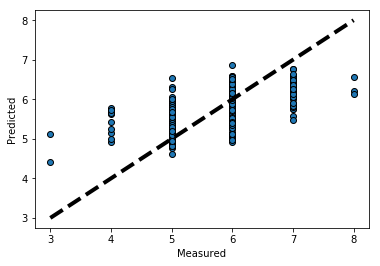

In [15]:
import matplotlib.pyplot as pyplt
#pyplt.scatter(y_pred, y_test,  color='black')

fig, ax = pyplt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
pyplt.show()

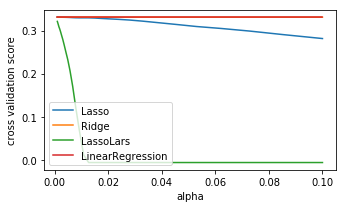

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LassoLars, LinearRegression
import numpy as np
from matplotlib import pyplot as plt

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge, LassoLars, LinearRegression]:
    scores = [cross_val_score(Model(alpha), X_train_scaled, y_train, cv=10).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [39]:
ridger = Ridge(alpha=1.0, solver = 'sag')
ridger.fit(X_train_scaled, y_train) 
y_pred = ridger.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.500918887846
Mean Squared Error: 0.40605157013
Root Mean Squared Error: 0.63722175899


In [33]:
from sklearn import linear_model
lassy = linear_model.Lasso(alpha=0.01)
lassy.fit(X_train_scaled, y_train)
y_pred = lassy.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.499926222051
Mean Squared Error: 0.400378338278
Root Mean Squared Error: 0.632754564012


In [34]:
laslars = LassoLars(alpha=0.0001)
laslars.fit(X_train_scaled, y_train)
y_pred = laslars.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.500050395529
Mean Squared Error: 0.403365233121
Root Mean Squared Error: 0.635110410182


In [35]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(random_state=0)
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.681191360438
Mean Squared Error: 0.645309037523
Root Mean Squared Error: 0.803311295528
